# Распознавание лиц


Для правильной тренировки необходимо использовать миллионы изображений, и это занимает много времени даже с десятками дорогих графических процессоров.

Вот почему методы, которые не требуют переподготовки на таких больших наборах данных, очень полезны. Трансферное обучение и эмбеддинг являются такими методами.

Методы глубокого обучения требуют много данных для каждого человека. На практике эти данные не всегда доступны.

In [6]:
import tensorflow as tf
import keras
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras import backend as K
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
K.clear_session()
from project.dg_face import utils, detection, alignment

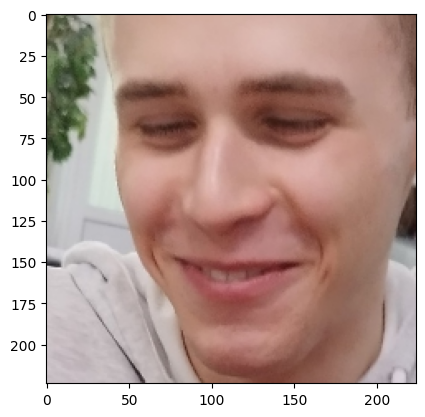

In [7]:
image = utils.load_image("belikov.jpg")
faces = detection.detect_faces(image)
aligned_face = alignment.aligned_face(image, faces[0])
plt.imshow(aligned_face)
plt.show()

# VGG16
Распознавание основанное на модели VGG16 (2015)
<img src="notebook_images/vgg_model.png" width="1000"/>
*Архитектура модели*

In [8]:
model = VGGFace(include_top=False, model='vgg16', input_shape=(224, 224, 3), pooling='avg')
model.summary()

58909280/58909280 [==============================] - 10s 0us/step
Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                     

## Получение эмбеддинга

In [11]:
img = preprocess_input(aligned_face.astype(float), version=1)
encoding = model.predict(np.array([img]))[0]
encoding

1/1 [==============================] - 0s 150ms/step


array([9.61519897e-01, 1.47231376e+00, 1.74437061e-01, 6.14646053e+00,
       0.00000000e+00, 1.62402141e+00, 1.15926421e+00, 4.12561446e-01,
       7.13110209e+00, 1.10045803e+00, 5.29033756e+00, 2.13502479e+00,
       5.81316710e-01, 2.87431359e+00, 4.17684317e+00, 1.41725755e+00,
       4.12800461e-01, 4.54952335e+00, 1.87489495e-01, 1.51294756e+00,
       0.00000000e+00, 6.92970228e+00, 4.20547485e+00, 5.34173107e+00,
       5.58639669e+00, 4.47271943e-01, 2.76758760e-01, 0.00000000e+00,
       1.46738577e+00, 0.00000000e+00, 3.24542046e+00, 7.49606323e+00,
       6.83716774e-01, 7.28841960e-01, 8.69439423e-01, 6.01587105e+00,
       3.76129842e+00, 2.60376549e+00, 5.26436186e+00, 1.00206938e+01,
       4.56103754e+00, 6.32697105e-01, 1.09003487e+01, 3.12824988e+00,
       2.10442376e+00, 4.29615021e-01, 1.14762220e+01, 4.21280289e+00,
       9.61820304e-01, 1.48859286e+00, 4.27650785e+00, 3.10146660e-01,
       2.91449785e+00, 6.93245307e-02, 7.22884178e-01, 7.59370685e-01,
      

# Другие варианты сетей

In [ ]:
vggface = VGGFace(model='resnet50')
vggface = VGGFace(model='senet50')